# Part 1: Review of Literature
##  [Schapiro et al. (2016)](http://rstb.royalsocietypublishing.org/content/372/1711/20160049.article-info): *Complementary learning systems within the hippocampus*

### Introduction
The **Complementary Learning Systems (CLS) theory** proposes a division of labor between the hippocampus and cerebral cortex in memory. Specifically, CLS theory proposes that the hippocampus uses a high learning rate and sparse, nonoverlapping representations for the rapid storage of episodic memory traces without interference from other recent experiences. In contrast, the cortex has a slow learning rate and overlapping representations, which allow it to extract and represent regularities from episodic traces from the hippocampus. 

CLS theory, however, is incompatible with the observations that humans (and other species) are also adept at inferring regular patterns on short timescales (minutes to hours), a skill linked to the hippocampus. This seeming inconsistency can be resolved by making use of the different subfields of the hippocampus. There are two main pathways connecting the subfields of the hippocampus: 

- **Trisynaptic pathway (TSP):** $EC_{in} \rightarrow DG \rightarrow CA3 \rightarrow CA1 $ 

> The projections of the TSP are sparse, and CA3 and DG exhibit especially high levels of within-layer inhibition. These porperties result in sparse activity at any point in time in DG and CA3, and allow the layers to avoid representational interference by forming separated patterns (even with similar inputs). The projections within TSP also demonstrate a high learning rate. 

- **Monosynaptic pathway (MSP):** $ EC \longleftrightarrow CA1 $ 

> The projections within the MSP are less sparse and inhibited, allowing for more units to be active at any time within CA1. The projections also exhibit a relatively lower learning rate. These properties make CA1 more cortex-like, and CA1 has previously been described as a translator between the sparse representations in the TSP and overlapping representations in entorhinal cortex (EC). 

The properties of TSP suggest that it could be the engine for rapid encoding and pattern separation of episodic memories within the hippocampus. In contrast, the MSP may mediate between TSP and cortex in generalizing from episodic traces. These hypotheses were tested in an artificial neural network. The network represented the structures described above, and modeled their responses to the rapid learning of new patterned stimuli.

### Methods
#### Model Architecture

The neural network model of the hippocampus was implemented in the Emergent simulation environment (v. 7.0.1). The model is comprised of units with activity levels ranging from 0 to 1. The activity of a given unit is proportional to the activity its input units weighted by their connection strengths. Unit activity is also inhibited by local inhibition between units within a layer. 

- **Inputs/Outputs** 

> The superficial EC ($\text{EC}_{in}$) provides input whereas deep EC ($\text{EC}_{out}$) represents the output. These layers are connected via a hidden layer. 

- **Trisynaptic pathway (TSP)** 

> EC projects to DG and CA3. These projections are sparse: each DA/CA3 node receives input from 25% of EC; each CA3 node receives input from only 5% of DG nodes. DG/CA3 also have high levels of within-layer inhibition. CA3 is fully connected to CA1.

- **Monosynaptic pathway (MSP)** 

> EC $\rightarrow$ CA1 and CA1 $\rightarrow$ EC are fully connected. CA1 is much less inhibited. 

#### Learning
The model is trained to adjust connection weights between units such that it can duplicate the input patterns on output. The network accomplishes this via *Contrastive Hebbian Learning*, wherein the network adjusts connection weights such that activity during a *minus phase* becomes more similar to activity during a *plus phase.* Here, the minus phase corresponds to an attempt at producing the correct image given the current weights. The plus phase corresponds to the model being directly shown the correct output. The difference between the two phases is the error. 

To simulate situations requiring the rapid extraction of regulatirities, three paradigms were designed:

- **Pair structure**

> Continuous presentation of items with embedded pair-sequence regularities. This task requires integrating statistics over time in order to uncover the regularities: the higher transition probability within vs. between pairs.

- **Community structure**

> Continuous presentation of items wherein items are grouped by higher-level associations. 

- **Associative inference**

> Querying associations based on share associates. Requires the rapid integration across experiences over time.

### Results
#### Learning Episodes vs. Regularities
In the **pair structure** paradigm, 4 groupings of 8 items were learned by the model. When no statistical learning is required (i.e. within-pair transitions presented only), the network quickly learns to produce both members of the pair in the out layer. CA3 and DG (of TSP) rapidly memorize the conjunctive representations and pattern complete the corresponding item when queried on the other. CA1, by contrast, is slower to learn but does ultimately come to represent the pairs. 

When statistical learning is required (i.e. within- and between-pair transitions presented), CA3 and DG are initially slow to learn the corresponding pairs though they eventually do. Interestingly, they ultimately represent the similarity of within-item pairs less than the non-statistical network reflecting the presence of between-pair transitions. CA1 is slower to learn but, as before, comes to represent the pairs. 

These simulations indicate that the TSP and MSP form different representations depending on the learning problem. When sensitivity to statistics is not required, the TSP memorizes each of the presented patterns and can complete them from a partial cue, while CA1 simply acts as a translator between CA3 and EC. When sensitivity to statistics is required, the TSP unhelpfully captures both the pairs and the transitions between them, while the MSP is able to represent the frequencies of item co-occurrence. In both cases, pattern completion expressed in $EC_{out}$ causes the pairmate to arrive on $EC_{in}$, and the pair’s representation activates throughout the network

#### Higher Level Learning
In the **community structure** paradigm, the network was presented sequences generated by a random walk on a graph structure with three densely connected subnetworks. The model sucecssfully learned to active other items from a test item's community. DG and CA3 initially represented all exposed pairs but largely ignored higher level structure; by contrast, CA1 was immediately sensitive to higher level structure.

Interestingly, these results extended to the community boundaries. DG and CA3 showed low similarity for within-community boundaries and high similarity for across-community boundaries, indicating that these regions had poor sensitivity to the higher level structure. By contrast, CA1 demonstrated high similarity for within-community boundaries. 

#### Associative Inference
In the **associative inference** paradigm, the network was presented with pairs of sequenes that obeyed transitivity (e.g. $A \rightarrow B \rightarrow C$). The results of these simulations matched the community structure simulations. In the initial response, DG/CA3 represented direct pairs (e.g. AB, BC), but not transitive pair (e.g. AC). In contrast,  CA1 had graded similarity structure that reflected transitive relationships. 

# Part 2: Questions
## Assemble Data

In [1]:
import os
import numpy as np
from pandas import read_csv, concat

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define training conditions.
## Train pairs: training with transitions.
## Train pairs wot: training without transitions.
training = ['train_pairs', 'train_pairs_wot']

## Define parameter settings.
## Baseline: MSP learning = 0.02, CA1 proportion = 0.25
## Problem 1: MSP learning = 0.40, CA1 proportion = 0.25
## Problem 2: MSP learning = 0.02, CA1 proportion = 0.01
parameters = ['baseline','problem1','problem2']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Concatenate files.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for t in training:
    
    for p in parameters:
        
        ## Locate files.
        files = sorted([f for f in os.listdir('data') if f.startswith('%s_%s_' %(t,p))])

        ## Load and concatenate files.
        df = concat([read_csv('data/%s' %f) for f in files])
        df.epoch += 1
        
        ## Write out.
        df.to_csv('data/%s_%s.csv' %(t,p), index=False)
        
print('Done.')

Done.


## Baseline

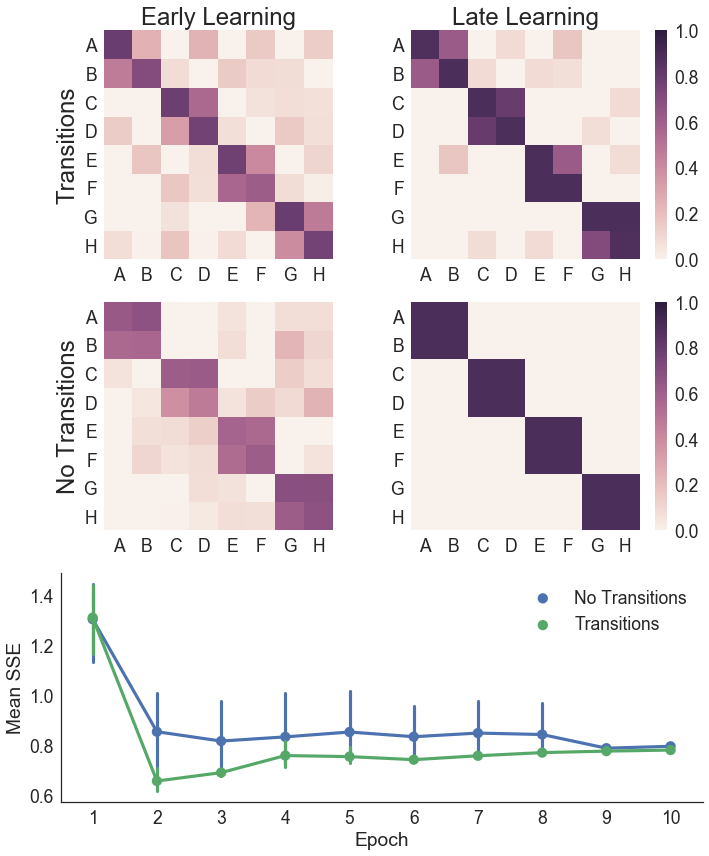

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
files = ['train_pairs_baseline.csv', 'train_pairs_wot_baseline.csv']

## Metadata parameters.
training = ['Transitions', 'No Transitions']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Convenience function.
def insert_metadata(df,info):
    df.insert(0,'training',info)
    return df

## Load and concatenate data.
df = concat([ insert_metadata( read_csv('data/%s' %f), info ) 
             for f, info in zip(files,training) ])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas. 
fig = plt.figure(figsize=(10,12))
ticks = df.trial_name.unique()
titles = ['Early Learning', 'Late Learning']

## Iteratively plot network weights.
for i, info in enumerate(training):
    
    for j, epoch in enumerate([2,10]):
                
        ## Prepare data.
        ix = np.logical_and(df.training==info, df.epoch==epoch)
        gb = df[ix].groupby('trial').mean().reset_index().filter(regex='EC')
        
        ## Plot.
        ax = plt.subplot2grid((3,2),(i,j))
        sns.heatmap(gb, vmin=0, vmax=1, square=True, cbar=j,
                    xticklabels=ticks, yticklabels=ticks, ax=ax)
        ax.set_yticklabels(ticks[::-1], rotation=0)
        if not i: ax.set_title(titles[j], fontsize=24)
        if not j: ax.set_ylabel(info, fontsize=24)

## Plot.
gb = df.groupby(['training','batch','epoch']).sse.mean().reset_index()
ax = plt.subplot2grid((3,2),(2,0),colspan=2)
sns.pointplot('epoch','sse','training',gb, ax=ax)
ax.set(xlabel='Epoch', ylabel='Mean SSE')
ax.legend(loc=1)
sns.despine(ax=ax)

plt.tight_layout()

## Question 1
What do you think will happen in the "train pairs" condition if you increase the MSP learning rate? Why? Write down your answer before running the simulation. 

The MSP learning rate is 0.02 by default. Try going up to 0.4. Write down what you found; were your results as expected? If you obtained unexpected results, try to explain why you obtained these (unexpected) results.

### *A priori* prediction
In addition being relatively less sparse and inhibited, the monosynaptic pathway (MSP) is characterized by a relatively slower learning rate. In combination, these enable components of the MSP (i.e. CA1) to be cortex-like and extract and represent statistical regularities from episodic traces. If the learning rate of the MSP is increased, then it is less likely to reflect the average patterns that emerge from large samples of experience; instead, it is more likely to reflect local statistics of individual episodes. In this way, an increased learning rate will cause the representations of MSP to reflect more closely that of the TSP. 

### Empirical Results

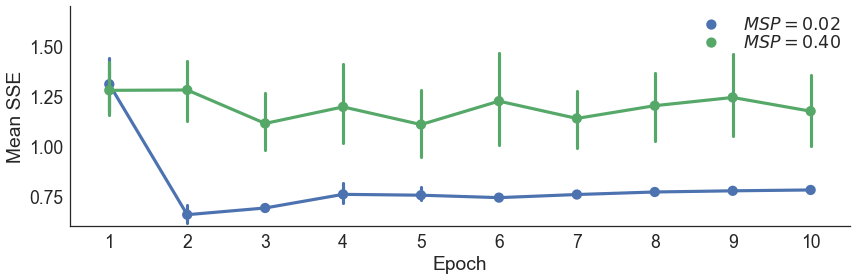

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
files = ['train_pairs_baseline.csv', 'train_pairs_problem1.csv']

## Metadata parameters.
parameters = [r'$MSP = 0.02$', r'$MSP = 0.40$']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Convenience function.
def insert_metadata(df,info):
    df.insert(0,'parameters',info)
    return df

## Load and concatenate data.
df = concat([ insert_metadata( read_csv('data/%s' %f), info ) 
             for f, info in zip(files,parameters) ])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas. 
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot.
gb = df.groupby(['parameters','batch','epoch']).sse.mean().reset_index()
sns.pointplot('epoch','sse','parameters',gb, ax=ax)
ax.set(xlabel='Epoch', ylabel='Mean SSE', ylim=(0.6,1.7), yticks=np.arange(0.75,1.75,0.25))
ax.legend(loc=1, borderpad=0, labelspacing=0)
sns.despine(ax=ax)

plt.tight_layout()

## Question 2
Change learning rate back to its original value. Now, what do you think will happen if you make CA1 activity more sparse (i.e., you decrease the average proportion of active neurons)? Why? Write down your answer before running the simulation. 

By default CA1 has CA1 proportion act=0.25 (25% of units active). Try turning CA1 proportion act down to 0.01. Write down what you found; were your results as expected? If you obtained unexpected results, try to explain why you obtained these (unexpected) results.

### Empirical Results

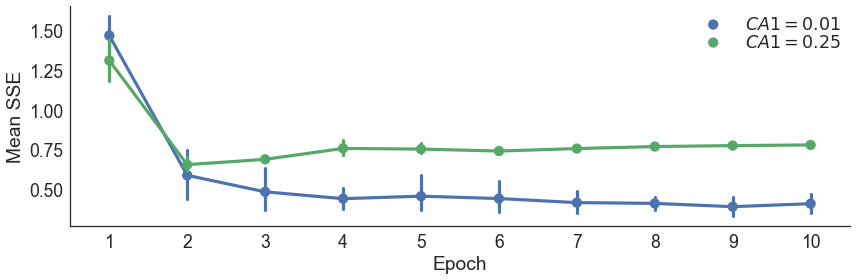

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
files = ['train_pairs_baseline.csv', 'train_pairs_problem2.csv']

## Metadata parameters.
parameters = [r'$CA1 = 0.25$', r'$CA1 = 0.01$']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Convenience function.
def insert_metadata(df,info):
    df.insert(0,'parameters',info)
    return df

## Load and concatenate data.
df = concat([ insert_metadata( read_csv('data/%s' %f), info ) 
             for f, info in zip(files,parameters) ])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas. 
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot.
gb = df.groupby(['parameters','batch','epoch']).sse.mean().reset_index()
sns.pointplot('epoch','sse','parameters',gb, ax=ax)
ax.set(xlabel='Epoch', ylabel='Mean SSE')
ax.legend(loc=1, borderpad=0, labelspacing=0)
sns.despine(ax=ax)

plt.tight_layout()

### *A priori* prediction

## Question 3
Now change from Train pairs to Train pairs without transitions. Do you think the above manipulations (of learning rate and sparsity) will have the same effect? Why? Write down your answer before running the simulations. Next, run the simulations and write down what you found. If you obtained unexpected results, try to explain why you obtained these (unexpected) results.

### *A priori* prediction